# Estimation des gisements à partir des données cantonales

### Modules

In [1]:
import numpy as np
import pandas as pd

In [2]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import IPython
from IPython.display import HTML

### Données cantonales

In [3]:
# Pour utiliser pd.read_excel, d'abord pip install xlrd

canton = pd.read_excel('Potentiels.xlsx', sheet_name = 'Donnees_Canton', header = 13, index_col = 0)

Les surfaces sont en hectares (1 km$^2$ = 100 ha), les rendements en quintal (= 0,1 t) par hectare et les productions en tonnes.

## Surfaces et rendements

Blé tendre, Blé dur, Triticale, Maïs grain, Maïs ensillage, Orge, Avoine, Sorgho, Seigle, Betterave, Pomme de terre,
Tournesol, Colza et Soja

In [4]:
canton = canton.iloc[:3689:, :] # les dernières lignes sont non renseignées

In [5]:
surf2010 = canton.iloc[:, 10:24:].copy()
rend2010 = canton.iloc[:, 24:38:].copy()
surf2050 = canton.iloc[:, 66:80:].copy()
rend2050 = canton.iloc[:, 94:108:].copy()

In [6]:
# Renommage nécessaire pour des opérations de comparaisons

head_list = ['Ble_tendre', 'Ble_dur', 'Triticale', 'Mais_grain', 'Mais_ensilage', 'Orge', 'Avoine',
            'Sorgho', 'Seigle', 'Betterave', 'Pomme_de_terre', 'Tournesol', 'Colza', 'Soja']

for i, col in enumerate(surf2010):
    surf2010.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(surf2050):
    surf2050.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(rend2010):
    rend2010.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(rend2050):
    rend2050.rename(columns = {col : head_list[i]}, inplace = True)

In [7]:
# Evolution de la production

production2010 = surf2010*rend2010 / 10 # conversion en tonne
production2050 = surf2050*rend2050 / 10
delta = production2050.sum(axis = 0) - production2010.sum(axis = 0)
delta_relatif = delta / production2010.sum(axis = 0)
(delta_relatif * 100).round(1) # en pourcents

Ble_tendre        -19.7
Ble_dur           -30.7
Triticale         -12.3
Mais_grain        -19.9
Mais_ensilage     -76.5
Orge              -24.2
Avoine            -20.3
Sorgho            -25.3
Seigle            -15.7
Betterave           2.2
Pomme_de_terre    -21.6
Tournesol         -10.3
Colza             -15.1
Soja              546.1
dtype: float64

In [8]:
# Evolution du rendement

moy10 = production2010.sum(axis = 0) / surf2010.sum(axis = 0) # en tonnes par hectare
moy50 = production2050.sum(axis = 0) / surf2050.sum(axis = 0) # en tonnes par hectare

delta_rend = (moy50 - moy10) / moy10
moy_rend = delta_rend.mean(axis = 0) * 100 # en pourcents
et_rend = delta_rend.std(axis = 0) * 100 # en pourcents

delta_rend

Ble_tendre       -0.180561
Ble_dur          -0.231172
Triticale        -0.263375
Mais_grain       -0.189227
Mais_ensilage    -0.148254
Orge             -0.235890
Avoine           -0.247566
Sorgho           -0.222428
Seigle           -0.256546
Betterave        -0.007143
Pomme_de_terre   -0.206532
Tournesol        -0.091656
Colza            -0.191460
Soja             -0.384299
dtype: float64

In [9]:
# Moyenne et incertitude

print(f'{moy_rend.round(1)} +/- {et_rend.round(1)} %')

-20.4 +/- 8.7 %


Une baisse de rendement moyen de 17% paraît ici encore optimiste.

In [10]:
# Evolution du rendement pondéré par la production

poids = production2010.sum(axis = 0) / production2010.sum(axis = 0).sum()
tabp = delta_rend * poids
(tabp.sum() * 100).round(1)

-14.3

In [11]:
# Plus simplement : production totale / surface totale

rm10 = production2010.sum(axis = 0).sum() / surf2010.sum(axis = 0).sum()
rm50 = production2050.sum(axis = 0).sum() / surf2050.sum(axis = 0).sum()

100 * (rm50 - rm10) / rm10 # en pourcents

-17.351148155793084

Ce chiffre de 17% reste donc cohérent.

In [12]:
# Évolution des surfaces

stotale10 = surf2010.sum().sum()
stotale50 = surf2050.sum().sum()

(100*stotale50/stotale10 - 100).round(1)

-5.0

Baisse de 5% de la surface cultivée en France.

## Résidus de culture

Résidus de culture pour le maïs fourrage et les pomme de terre et paille pour le reste (en tonnes).

In [13]:
res2010 = canton.iloc[:, 140:154:].copy()
res2050 = canton.iloc[:, 154:168:].copy()

In [14]:
for i, col in enumerate(res2010):
    res2010.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(res2050):
    res2050.rename(columns = {col : head_list[i]}, inplace = True)

### Production relative de résidus de culture

In [15]:
prodres2010 = res2010.sum(axis = 0)
prod2010 = (surf2010 * rend2010).sum(axis = 0) / 10

In [16]:
prodres2010 / prod2010

Ble_tendre        0.884694
Ble_dur           1.081818
Triticale         1.081818
Mais_grain        0.884694
Mais_ensilage     0.111111
Orge              0.850000
Avoine            1.126744
Sorgho            1.173810
Seigle            0.850000
Betterave         0.100000
Pomme_de_terre    0.075000
Tournesol         1.725758
Colza             2.081034
Soja              1.806250
dtype: float64

In [17]:
prodres2050 = res2050.sum(axis = 0)
prod2050 = (surf2050 * rend2050).sum(axis = 0) / 10

In [18]:
prodres2050 / prod2050

Ble_tendre        0.884694
Ble_dur           1.081818
Triticale         1.081818
Mais_grain        0.884694
Mais_ensilage     0.111111
Orge              0.850000
Avoine            1.126744
Sorgho            1.173810
Seigle            0.850000
Betterave         0.100000
Pomme_de_terre    0.075000
Tournesol         1.725758
Colza             2.081034
Soja              1.806250
dtype: float64

La projection a conservé les mêmes coefficients en 2050 qu'en 2010.

### Méthanisation de la paille

In [19]:
prodPaille2010 = canton['Production_Paille_2010'] # en tonnes
soldePaille2010 = canton['Solde_Paille_2010'] # en tonnes
mobilisationPaille2010 = canton['Paille_Methanisee_2010'] # en tonnes
methanePaille2010 = canton['CH4_Paille 2010'] # en m3

In [20]:
straw = ['Ble_tendre', 'Ble_dur', 'Triticale', 'Mais_grain', 'Orge', 'Avoine',
            'Sorgho', 'Seigle', 'Betterave', 'Tournesol', 'Colza', 'Soja']

strawProd2010 = res2010.loc[:, straw].sum(axis = 1)

On trouve approximativement les mêmes valeurs pour strawProd2010 et prodPaille2010. On se fie donc à la deuxième
qui correspond à des relevés directs.

In [21]:
# Calcul du taux de mobilisation en 2010 en pourcents de la production totale de paille

prodNonNulle10 = canton['Production_Paille_2010'] > 0
100*(canton.loc[prodNonNulle10, 'Paille_Methanisee_2010']/canton.loc[prodNonNulle10, 'Production_Paille_2010']).mean().round(3)

17.2

In [22]:
# Calcul du taux de mobilisation en 2050 en pourcents de la production totale de paille

prodNonNulle50 = canton['Production_Paille_2050'] > 0
100*(canton.loc[prodNonNulle50, 'Paille_Methanisee_2050']/canton.loc[prodNonNulle50, 'Production_Paille_2050']).mean().round(3)

17.9

L'hypothèse consistant à prendre un taux de mobilisation uniforme de 20% semble donc un peu optimiste mais cohérente.

In [23]:
# Pouvoir méthanogène

(canton.loc[prodNonNulle10, 'CH4_Paille 2010']/canton.loc[prodNonNulle10, 'Paille_Methanisee_2010']).mean()

221.0

On retrouve un pouvoir méthanogène de la paille de 221 $m^3_{CH_4}/t_{MS}$ comme dans le rapport de l'ADEME (assez logique puisque leur source est Solagro).

### Gisement paille

In [24]:
# Gisement 2010 en TWh (PCI(CH4) = 11.04 kWh/Nm3)

(canton['CH4_Paille 2010'].sum()*11.04 / 10**9).round(3)

37.041

In [25]:
# Gisement 2050 en TWh (PCI(CH4) = 11.04 kWh/Nm3)

(canton['CH4_Paille 2050'].sum()*11.04 / 10**9).round(3)

30.021

## CIMSE

Rendements en tonnes de matière sèche par hectare, surfaces en ha et productions en tonnes.

In [26]:
cisme = canton.iloc[:, 126:140:]

In [27]:
def contains(mot, liste):
    def aux(chaine):
        return mot in chaine
    aux = np.vectorize(aux)
    return aux(liste)

col = np.array(cisme.columns)
    
cisme_h10 = cisme.loc[:, contains('hiver', col) & contains('2010', col)].copy()
cisme_h50 = cisme.loc[:, contains('hiver', col) & contains('2050', col)].copy()
cisme_e10 = cisme.loc[:, (contains('ete', col) | contains('été', col)) & contains('2010', col)].copy()
cisme_e50 = cisme.loc[:, (contains('ete', col) | contains('été', col)) & contains('2050', col)].copy()

In [28]:
cisme_h = ['Rend_production', 'Rend_recolte', 'Surface']

for i, col in enumerate(cisme_h10):
    cisme_h10.rename(columns = {col : cisme_h[i]}, inplace = True)
for i, col in enumerate(cisme_e10):
    cisme_e10.rename(columns = {col : cisme_h[i]}, inplace = True)
for i, col in enumerate(cisme_h50):
    cisme_h50.rename(columns = {col : cisme_h[i]}, inplace = True)
for i, col in enumerate(cisme_e50):
    cisme_e50.rename(columns = {col : cisme_h[i]}, inplace = True)

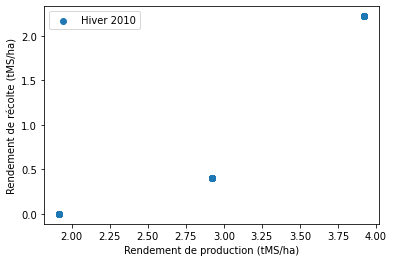

In [29]:
x = np.array(cisme_h10['Rend_production'])
y = np.array(cisme_h10['Rend_recolte'])

plt.xlabel('Rendement de production (tMS/ha)')
plt.ylabel('Rendement de récolte (tMS/ha)')
plt.scatter(x, y, label = 'Hiver 2010')
plt.legend();

On va essayer un autre modèle.

### Calcul du gisement à la main pour 2050

In [30]:
# Données départementales

dpt = pd.read_excel('Potentiels.xlsx', sheet_name = 'DPT', header = 13, index_col = 2)

In [31]:
# Cultures intermédiaires à prendre en compte pour 2050

liste_ete = ["Colza","Ble_dur", "Ble_tendre", "Triticale", "Avoine", "Seigle"]
# et orge et escourgeon
liste_hiver = ["Tournesol", "Mais_ensilage", "Mais_grain", "Betterave", "Pomme_de_terre", "Sorgho","Soja"]
# et pois et orge de printemps

# Conditions climatiques par saison (voir carte p.207 du rapport de l'ADEME)

bon_ete = ['29', '22', '56', '35', '50', '14', '27', '76', '62', '59', '80', '60', '02',
           '28', '45','78', '91', '77', '95', '92', '93', '94', '75']

mediocre_ete = ['33', '24', '40', '47', '64', '12', '46', '81', '82',
                '31', '32', '09', '65', '66', '11', '34', '30', '48', '07', '26', '13',
                '83', '84', '04', '05', '06', '2A', '2B']

bon_hiver = ['29', '22', '56', '35', '50', '14', '27', '76', '62', '80', '60',
             '28', '45', '78', '91', '77', '95', '92', '93', '94', '61', '53', '72',
             '44', '49', '85', '18', '36', '37', '41', '79', '86', '16', '17', '75']

mediocre_hiver = ['12', '46', '09', '66', '11', '34', '30', '48', '07', '26', '13', '83',
                  '84', '04', '05', '06', '2A', '2B', '15', '42', '43', '73', '74', '39', '25', '90']

In [32]:
dpt = dpt.iloc[0:96:, :]

In [33]:
# Rendements DE RÉCOLTE par département et saison en tMS/ha/an

dpt['Rend_MS_ete'] = .4 # été moyen
dpt['Rend_MS_hiver'] = 3. # hiver moyen

dpt.loc[bon_ete, 'Rend_MS_ete'] = 2.7
dpt.loc[mediocre_ete, 'Rend_MS_ete'] = .0

dpt.loc[bon_hiver, 'Rend_MS_hiver'] = 4.9
dpt.loc[mediocre_hiver, 'Rend_MS_hiver'] = 1.3

In [34]:
sdpt2050 = dpt.iloc[:, 66:80:].copy() # surfaces à l'échelle départementale
rdpt2050 = dpt.iloc[:, 94:108:].copy() # rendements à l'échelle départementale

In [35]:
for i, col in enumerate(rdpt2050):
    rdpt2050.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(sdpt2050):
    sdpt2050.rename(columns = {col : head_list[i]}, inplace = True)

In [36]:
s2050_ete = sdpt2050[liste_ete].sum(axis = 1) # surfaces totales de CISME d'été
s2050_hiver = sdpt2050[liste_hiver].sum(axis = 1) # surfaces totales de CISME d'hiver

In [37]:
prod2050_hiver = s2050_hiver * dpt['Rend_MS_hiver']
prod2050_ete = s2050_ete * dpt['Rend_MS_ete']

# Il y a des CIMSES d'été (resp. d'hiver) toute l'année !

print(prod2050_hiver.sum().round(0))
print(prod2050_ete.sum().round(0))

13005594.0
7973691.0


In [38]:
# Si on veut faire les mêmes calculs pour 2010...
# Mais il ne faudrait pas prendre en compte les mêmes CISME

sdpt2010 = dpt.iloc[:, 10:24:].copy() 
rdpt2010 = dpt.iloc[:, 24:38:].copy()

for i, col in enumerate(rdpt2010):
    rdpt2010.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(sdpt2010):
    sdpt2010.rename(columns = {col : head_list[i]}, inplace = True)
    
s2010_ete = sdpt2010[liste_ete].sum(axis = 1)
s2010_hiver = sdpt2010[liste_hiver].sum(axis = 1)

On obtient 13 $Mt_{MS}$ de récolte totale de CISME d'hiver en France métropolitaine en 2050 et 8 $Mt_{MS}$ en été pour un seuil de rentabilité uniforme à $4$ tMS/ha au-delà duquel on prend 100% de la production (on en produit 2 $Mt_{MS}/an$ aujourd'hui d'après l'ADEME).

On obtient donc un total très proche des prévisions.

On prend un pouvoir méthanogène pour les CIMSE de 218 $m^3_{CH_4}/t_{MS}$ (voir p.219 du rapport de l'ADEME)et toujours un PCI de 11,04 $kWh/m^3_{CH_4}$ pour le méthane.

D'où un gisement de 50 TWh en 2050.

### Analyse de sensibilité : seuil de rentabilité

Voir p.207 et 208 du rapport de l'ADEME. Le seuil de rentabilité est estimé à un rendement de récolte de 4 tMS/ha.

In [39]:
surface_cimse_bon_ete50 = sdpt2050.loc[bon_ete, liste_ete].sum(axis = 1).sum()
surface_cimse_mediocre_ete50 = sdpt2050.loc[mediocre_ete, liste_ete].sum(axis = 1).sum()
surface_cisme_moyen_ete50 = s2050_ete.sum() - surface_cimse_mediocre_ete50 - surface_cimse_bon_ete50

surface_cimse_bon_hiver50 = sdpt2050.loc[bon_hiver, liste_hiver].sum(axis = 1).sum()
surface_cimse_mediocre_hiver50 = sdpt2050.loc[mediocre_hiver, liste_hiver].sum(axis = 1).sum()
surface_cisme_moyen_hiver50 = s2050_hiver.sum() - surface_cimse_mediocre_hiver50 - surface_cimse_bon_hiver50

In [40]:
rend_moyen_hiver = [6,5.4,5,4.7,4.4,4.1,3.8,3.4,3.1,2.8]
rend_moyen_ete = [4,3.7,3.5,3.4,3.2,3,2.9,2.7,2.6,2.4]

In [41]:
yields = {}

for y in rend_moyen_hiver:
    try:
        yields[y] += surface_cisme_moyen_hiver50/10 # on divise par 10 car cela concerne un décile (tableau p.207)
    except:
        yields[y] = surface_cisme_moyen_hiver50/10
    try:
        yields[y + 1] += surface_cimse_bon_hiver50/10
    except:
        yields[y + 1] = surface_cimse_bon_hiver50/10
    try:
        yields[y - 1] += surface_cimse_mediocre_hiver50/10
    except:
        yields[y - 1] = surface_cimse_mediocre_hiver50/10
        
for y in rend_moyen_ete:
    try:
        yields[y] += surface_cisme_moyen_ete50/10
    except:
        yields[y] = surface_cisme_moyen_ete50/10
    try:
        yields[y + 1] += surface_cimse_bon_ete50/10
    except:
        yields[y + 1] = surface_cimse_bon_ete50/10
    try:
        yields[y - 1] += surface_cimse_mediocre_ete50/10
    except:
        yields[y - 1] = surface_cimse_mediocre_ete50/10

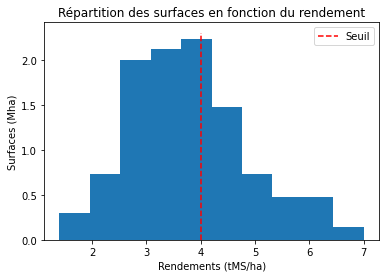

In [42]:
r = np.array(list(yields.keys()))
s = np.array(list(yields.values()))

plt.plot([4., 4.], [0., 2.3], 'r--', label = 'Seuil')

plt.hist(r, weights = s / 10**6)
plt.xlabel('Rendements (tMS/ha)')
plt.ylabel('Surfaces (Mha)')
plt.title('Répartition des surfaces en fonction du rendement')
plt.legend();

In [43]:
# Hachurage de la partie à droite du seuil
# np.histogram donne les valeurs calculées pour tracer l'histogramme

hist, edges = np.histogram(r, weights = 11.04*218*r*s / 10**9, density = False)
edges = [4., 4.2, 4.2, 4.76, 4.76, 5.32, 5.32, 5.88, 5.88, 6.44, 6.44, 7.]
area = [20.87357507, 20.87357507, 15.84240064, 15.84240064, 8.77933886, 8.77933886,  
        6.33038242, 6.33038242, 7.05733271, 7.05733271, 2.47531816, 2.47531816]

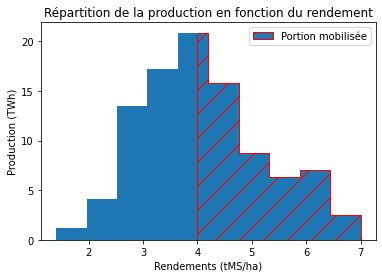

In [44]:
#plt.plot([4., 4.], [0., 21.4], '--', color = 'red', label = 'Seuil')

plt.hist(r, weights = 11.04*218*r*s / 10**9, zorder = 1)
plt.fill_between(edges, area, hatch = '/', edgecolor = 'red', zorder = 2, label = 'Portion mobilisée')
plt.xlabel('Rendements (tMS/ha)')
plt.ylabel('Production (TWh)')
plt.title('Répartition de la production en fonction du rendement')
plt.yticks(np.arange(0, 21, 5))
plt.legend();
#plt.savefig('seuil.png', dpi = 1200)

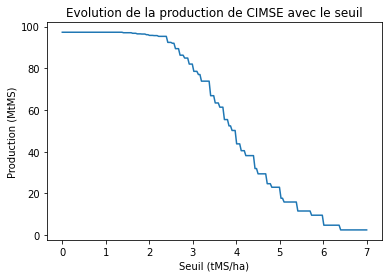

In [45]:
def threshold(seuil):
    res = 0
    for key in yields:
        if key >= seuil:
            res += 11.04*218*key*yields[key]
    return res

threshold = np.vectorize(threshold)
t = np.linspace(0., 7., 200)
plt.plot(t, threshold(t) / 10**9)
plt.xlabel('Seuil (tMS/ha)')
plt.title('Evolution de la production de CIMSE avec le seuil')
plt.ylabel('Production (MtMS)');

In [46]:
print(f'Un seuil à 3 tMS/ha donne {round(threshold(3)/10**9, 1)} TWh.')
print(f'Un seuil à 5 tMS/ha donne {round(threshold(5)/10**9, 1)} TWh.')

Un seuil à 3 tMS/ha donne 82.0 TWh.
Un seuil à 5 tMS/ha donne 22.9 TWh.


## Elevage

Masses de déjections en $t_{MS}$ et potentiel et volume de CH$_4$ en m$^3$.

In [47]:
cheptel10 = canton.loc[:, 'Vaches_laitieres_2010':'Poules_pondeuses_2010'].copy()
cheptel50 = canton.loc[:, 'Vaches_laitieres_2050':'Poules_pondeuses_2050'].copy()

In [48]:
cheptel_header = ['Vaches_laitieres', 'Vaches_allaitantes', 'Brebis', 'Porcs', 'Poulets', 'Poules']

for i, col in enumerate(cheptel10):
    cheptel10.rename(columns = {col : cheptel_header[i]}, inplace = True)
for i, col in enumerate(cheptel50):
    cheptel50.rename(columns = {col : cheptel_header[i]}, inplace = True)

In [49]:
# Fumier et déjections

liste_dej2010 = ['Fumier_2010', 'Lisier_2010', 'Fientes_2010',
                       'Dejections_Potentiel_Total_2010', 'CH4_Dej']
liste_dej2050 = ['Fumier_2050', 'Lisier_2050', 'Fientes_2050',
                       'Dejections_Potentiel_Total_2050', 'CH4_Dej 2050']

dej2010 = canton[liste_dej2010].copy()
dej2050 = canton[liste_dej2050].copy()

dej_header = ['Fumier', 'Lisier', 'Fientes', 'Total_dejections', 'CH4']

for i, col in enumerate(dej2010):
    dej2010.rename(columns = {col : dej_header[i]}, inplace = True)
for i, col in enumerate(dej2050):
    dej2050.rename(columns = {col : dej_header[i]}, inplace = True)

### Taux de mobilisation

Sommes nationales dans la base de données.

On a de l'ordre de 28 $Mt_{MS}$ de déjections d'élevage en 2010 et 15 en 2050.

On prend un pouvoir méthanogène de 170 $m^3_{CH_4}/t_{MS}$.

On obtient un taux de mobilisation de 52% en 2010 contre 96% en 2050.

### Impact de la réduction des cheptels

In [50]:
cheptels_nat10 = cheptel10.sum(axis = 0)
cheptels_nat50 = cheptel50.sum(axis = 0)
evolution_cheptels = 100 * (cheptels_nat50 - cheptels_nat10) / cheptels_nat10 # en pourcents

In [51]:
evolution_cheptels.round(1)

Vaches_laitieres     -28.9
Vaches_allaitantes   -61.5
Brebis                16.6
Porcs                -39.0
Poulets              -36.3
Poules               -21.7
dtype: float64

Or, on obtient la même quantité de méthane produit grâce aux déjections d'élevages en 2010 et en 2050. Donc la hausse du taux de mobilisation compense la réduction des cheptels.

On a alors un potentiel de 28 TWh.

### Compétition méthanisation fourrage et déjection

Voir équations 1 et 2 du rapport de l'ADEME p.215 et 217.

In [52]:
# Données issues du tableau p.216, en % de la MS
# Incertitude sur le paturage, sur la part fumier, sur les besoins en paille

df = pd.DataFrame(data = np.array([[1.95, 1.61, 0.15, 0.076, 0.012, 0.012], [0.6, 1.1, 1.1, 1.1, 1.1, 1.1]]).T, 
                  columns = ['excretion', 'paille_dans_fumier'], 
                  index = ['Vaches_laitieres', 'Vaches_allaitantes', 'Brebis', 'Porcs', 'Poulets', 'Poules'])

df['nombre_2010'] = cheptel10.sum(axis = 0)
#df['nombre_2050'] = cheptel50.sum(axis = 0)
df['besoin_paille'] = [1.5, 1.5, 1., 1., 0., 0.] # voir p.217

df["part_fumier"] = [0.9, 0.9, 0.1, 0.9, 0, 0] # source ?

# Source Afterre 2050 : p.32 à 34

df['paturage_2010'] = [0.4, 0.6, 0, 0, 0, 0]
df['rotation_2010'] = [1, 1, 1, 2.5, 1, 6] # nombre d'animaux par place et par an

# Exploitation

df['fumier_2010'] = (df['nombre_2010']/df['rotation_2010'])*df['excretion']*(1 + df['paille_dans_fumier'])*(1 - df['paturage_2010'])*df['part_fumier']
# nombre de places = (nombre d'animaux)/(nombres d'animaux par place)

df['lisier_2010'] = (df['nombre_2010']/df['rotation_2010'])*df['excretion']*(1 - df['paturage_2010'])

df['paille_2010'] = (df['nombre_2010']/df['rotation_2010'])*df['besoin_paille']*df['part_fumier']
# (nombre de places)*(part fumier) = nombre de places fumier

# Energie

df["pouvoir_meth_fumier"] = [168, 168, 192, 192, 240, 240] #tableau 62 (inventé pour ovin), en m3/tMS
df["pouvoir_meth_lisier"] = [160, 160, 160, 232, 240, 240]
pouvoir_meth_paille = 221
PCS_CH4 = 11.04*10**(-9) # en TWh / m3

df['energie'] = (df['fumier_2010']*df['pouvoir_meth_fumier'] + df['lisier_2010']*df['pouvoir_meth_lisier'])*PCS_CH4
df['energie_perdue'] = pouvoir_meth_paille*df['paille_2010']*PCS_CH4

df

,excretion,paille_dans_fumier,nombre_2010,besoin_paille,part_fumier,paturage_2010,rotation_2010,fumier_2010,lisier_2010,paille_2010,pouvoir_meth_fumier,pouvoir_meth_lisier,energie,energie_perdue
Vaches_laitieres,1.950,0.6,3698632.0,1.5,0.9,0.4,1.0,6.231455e+06,4.327399e+06,4993153.20,168,160,19.201523,12.182495
Vaches_allaitantes,1.610,1.1,4089332.0,1.5,0.9,0.6,1.0,4.977371e+06,2.633530e+06,5520598.20,168,160,13.883497,13.469376
Brebis,0.150,1.1,5381142.0,1.0,0.1,0.0,1.0,1.695060e+05,8.071713e+05,538114.20,192,160,1.785086,1.312913
Porcs,0.076,1.1,8502746.0,1.0,0.9,0.0,2.5,4.885338e+05,2.584835e+05,3060988.56,192,232,1.697584,7.468322
Poulets,0.012,1.1,130916950.0,0.0,0.0,0.0,1.0,0.000000e+00,1.571003e+06,0.00,240,240,4.162531,0.000000
Poules,0.012,1.1,39233851.0,0.0,0.0,0.0,6.0,0.000000e+00,7.846770e+04,0.00,240,240,0.207908,0.000000


La plus grande partie du potentiel concerne les élevages bovins !

### Analayse de sensibilité

Quel serait l'effet d'une réduction  plus importante des cheptels si on valorisait la paille qu'ils nécessitent par méthanisation ? Indépendemment des besoins en élevage, vaut-il mieux méthaniser la paille directement ou les déjections induites par les élevages qui l'utilisent ?

In [53]:
energie = 0.96*df.loc[:'Poulets','energie'] # taux de mobilisation de 96%

energie_paille_perdue = 0.2*df.loc[:'Poulets', 'energie_perdue'] # taux de mobilisation de 20%

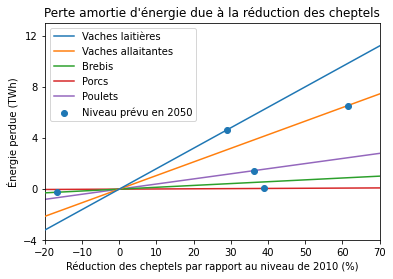

In [54]:
t = np.linspace(-20, 71, 2)
label = dict([('Vaches_laitieres', 'Vaches laitières'), ('Vaches_allaitantes','Vaches allaitantes'),
              ('Brebis', 'Brebis'), ('Porcs', 'Porcs'), ('Poulets', 'Poulets')])

niveau_2050 = []
order = 5

for x in energie.index:
    plt.plot(t, (energie[x] - energie_paille_perdue[x])*t/100, label = label[x], zorder = order)
    val = evolution_cheptels[x]
    niveau_2050.append(-(energie[x] - energie_paille_perdue[x])*val/100)
    order -= 1
plt.xlim(-20, 70)
plt.ylim(-4, 13)
plt.yticks(np.arange(-4, 13, 4))
plt.scatter(- evolution_cheptels[:'Poulets'], niveau_2050, label = 'Niveau prévu en 2050', zorder = 6)
plt.legend()
plt.xlabel('Réduction des cheptels par rapport au niveau de 2010 (%)')
plt.ylabel('Énergie perdue (TWh)')
plt.title("Perte amortie d'énergie due à la réduction des cheptels");
#plt.savefig('sensibilite_dejections.png', dpi = 1200)

## Conclusion ressources pour la méthanisation

### Hypothèses

Résumé des hypothèses pour 2050 :

$PCI_{CH4}$ = 11,04 $kWh/Nm^3$

Taux de mobilisation des résidus de cultures : 20% \
Pouvoir méthanogène des résidus de cultures : 221 $m^3_{CH_4}/t_{MS}$

Seuil de récolte des CIMSE : 4 $t_{MS}/ha$ au-delà duquel on mobilise 100% \
Pouvoir méthanogène des CIMSE : 218 $m^3_{CH_4}/t_{MS}$

Taux de mobilisation des déjections d'élevage : 96% \
Pouvoir méthanogène des déjections d'élevages : environ 170 $m^3_{CH_4}/t_{MS}$

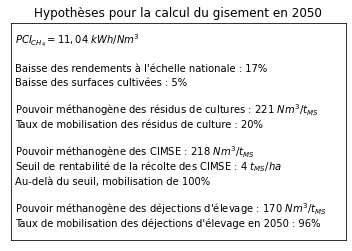

In [55]:
# Encart hypothèses

plt.xlim(0, 350)
plt.ylim(40, 195)
plt.xticks([])
plt.yticks([])
plt.text(5, 180, '$PCI_{CH_4} = 11,04 \ kWh/Nm^3$')
plt.text(5, 160, "Baisse des rendements à l'échelle nationale : 17%")
plt.text(5, 150, "Baisse des surfaces cultivées : 5%")
plt.text(5, 130, 'Pouvoir méthanogène des résidus de cultures : $221 \ Nm^3/t_{MS}$')
plt.text(5, 120, 'Taux de mobilisation des résidus de culture : 20%')
plt.text(5, 100, 'Pouvoir méthanogène des CIMSE : $218 \ Nm^3/t_{MS}$')
plt.text(5, 90, 'Seuil de rentabilité de la récolte des CIMSE : $4 \ t_{MS}/ha$')
plt.text(5, 80, 'Au-delà du seuil, mobilisation de 100%')
plt.text(5, 60, "Pouvoir méthanogène des déjections d'élevage : $170 \ Nm^3/t_{MS}$")
plt.text(5, 50, "Taux de mobilisation des déjections d'élevage en 2050 : 96%")
plt.title("Hypothèses pour la calcul du gisement en 2050");
#plt.savefig('hypotheses.png', dpi = 1200)

### Résultats

Résumé des résultats pour 2050 :

30 TWh pour les résidus de cultures.
\
50 TWh pour les CIMSE.
\
28 TWh pour les déjections d'élevages.

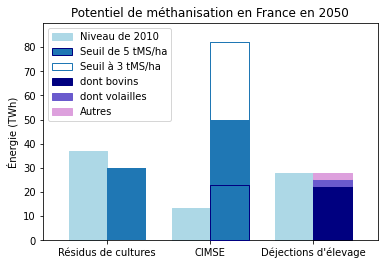

In [56]:
X = np.array([12.5, 20])

plt.xlim(0, 65)
plt.ylim(0, 90)
plt.fill_between(X - 7.5, np.array([37, 37]), color = 'lightblue', label = 'Niveau de 2010')
plt.fill_between(X, np.array([30, 30]))
plt.fill_between(X + 12.5, np.array([13.3, 13.3]), color = 'lightblue')
plt.fill_between(X + 20, np.array([50, 50]), color = 'tab:blue', zorder = 2,
                edgecolor = 'tab:blue')
plt.fill_between(X + 20, np.array([23, 23]), color = 'tab:blue', edgecolor = 'navy',
         label = 'Seuil de 5 tMS/ha', zorder = 3)
plt.fill_between(X + 20, np.array([82, 82]), color = 'white', edgecolor = 'tab:blue',
                 label = 'Seuil à 3 tMS/ha', zorder = 1)
plt.fill_between(X + 32.5, np.array([28, 28]), color = 'lightblue')
plt.fill_between(X + 40, np.array([.8*28, .8*28]),
                 color = 'navy', label = 'dont bovins')
plt.fill_between(X + 40, np.array([.9*28, .9*28]), np.array([.8*28, .8*28]),
                 color = 'slateblue', label = 'dont volailles')
plt.fill_between(X + 40, np.array([28, 28]), np.array([.9*28, .9*28]),
                 color = 'plum', label = 'Autres')
plt.xticks(np.arange(12.5, 53, 20), ('Résidus de cultures', 'CIMSE', "Déjections d'élevage"))
plt.yticks(np.arange(0, 81, 10))
plt.title('Potentiel de méthanisation en France en 2050')
plt.ylabel('Énergie (TWh)')
plt.legend(loc = 'upper left');
#plt.savefig('methanisation.png', dpi = 1200)

## ACV

Graphique issu du "Résumé de l’étude sur l’évaluation des impacts GES de l’injection du biométhane dans les réseaux de gaz" de GRDF

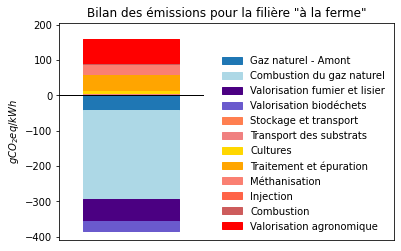

In [117]:
large = np.arange(-2, 3, 4)

def trait(val):
    return np.array([val, val])

plt.plot(np.array([-5, 3]), np.zeros(2), color = 'black', linewidth = 1)
plt.fill_between(large, trait(-42.6), label = 'Gaz naturel - Amont', color = 'tab:blue')
plt.fill_between(large, trait(-294.2), trait(-42.6), label = 'Combustion du gaz naturel',
                color = 'lightblue')
plt.fill_between(large, trait(-356.2), trait(-294.2),
                 label = 'Valorisation fumier et lisier', color = 'indigo')
plt.fill_between(large, trait(-383.1), trait(-356.2),
                 label = 'Valorisation biodéchets', color = 'slateblue')
plt.fill_between(large, trait(3.7), color = 'coral',
                label = 'Stockage et transport')
plt.fill_between(large, trait(7.6), trait(3.7), color = 'lightcoral',
                label = 'Transport des substrats')
plt.fill_between(large, trait(13.8), trait(7.6), color = 'gold',
                label = 'Cultures')
plt.fill_between(large, trait(61.6), trait(13.8), color = 'orange',
                label = 'Traitement et épuration')
plt.fill_between(large, trait(88.6), trait(61.6), color = 'salmon',
                label = 'Méthanisation')
plt.fill_between(large, trait(89.8), trait(88.6), color = 'tomato',
                label = 'Injection')
plt.fill_between(large, trait(91.5), trait(89.8), color = 'indianred',
                label = 'Combustion')
plt.fill_between(large, trait(160.5), trait(91.5), color = 'red',
                label = 'Valorisation agronomique')
plt.xlim(-3, 11)
plt.ylim(-410, 205)
plt.xticks([])
plt.yticks(np.arange(-400, 201, 100))
plt.title('Bilan des émissions pour la filière "à la ferme"')
plt.ylabel('$gCO_2eq/kWh$')
plt.legend(loc = 'lower right', frameon = False);
#plt.savefig('ACV.png', dpi = 1200)

## Visualisation

Source départements : https://www.data.gouv.fr/fr/datasets/carte-des-departements-2-1/#_

La Corse (départements 20A et 20B) prend les lignes 6 et 7 et il n'y a donc pas de département 20.

Source régions : https://public.opendatasoft.com/explore/dataset/contours-geographiques-des-nouvelles-regions-metropole/export/

In [58]:
france = gpd.read_file('departements.geojson')

In [59]:
regfr = gpd.read_file('regions.geojson')

In [60]:
def viz(col, background = france, color = None, frame = True, title = None, title_saved = None):
    fig, ax = plt.subplots(1, 1)
    if color:
        background.plot(column = col, ax = ax, legend = True, cmap = color)
    else:
        background.plot(column = col, ax = ax, legend = True)
    if not frame: # si on veut enlever le cadre
        ax.set_axis_off()
    if title:
        ax.set_title(title)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False);
    if title_saved:
        fig.savefig(title_saved + '.png', dpi = 1200)

### Consommation de gaz France

Source données historiques : https://fr.statista.com/statistiques/483291/gaz-consomme-france/

https://www.statistiques.developpement-durable.gouv.fr/bilan-physique-et-monetaire-du-gaz-naturel-2011-2016?rubrique=&dossier=186

https://www.insee.fr/fr/statistiques/2569466?sommaire=2587886#:~:text=Corrig%C3%A9e%20des%20variations%20climatiques%2C%20la,le%20r%C3%A9sidentiel%2Dtertiaire%20est%20stable.

Source projections : https://www.data.gouv.fr/fr/datasets/scenarios-de-consommation-de-gaz-de-production-de-gaz-vert-et-de-mobilite-gaz-a-horizon-2035/

In [61]:
passe = [1973, 1985, 2000, 2011, 2012, 2013, 2014, 2015]
consommation = [169, 291, 479, 460, 500, 510, 460, 465]

In [62]:
GNFR = pd.read_csv('projection_consoGN.csv', delimiter=";", low_memory = False)

In [63]:
GNFR = GNFR.groupby('annee')

In [64]:
projection = dict()
scenario = ['orange', 'rouge', 'bleu', 'violet']

for x in scenario:
    projection[x] = []
    
for name, dataframe in GNFR:
    for x in scenario:
        projection[x].append(dataframe['scenario_' + x].sum())

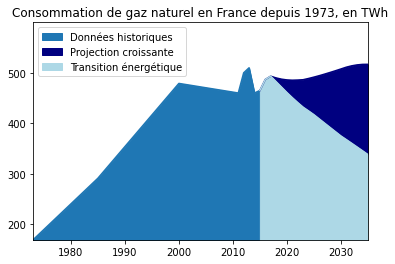

In [65]:
temps = [x for x in range(2015, 2036, 1)]

projection['violet'][3] = 465
projection['orange'][3] = 465

plt.plot(passe, consommation, color = 'tab:blue')
plt.fill_between(passe, consommation, label = 'Données historiques', color = 'tab:blue')
plt.fill_between(temps, projection['orange'][3:], projection['violet'][3:],
                 color = 'navy', label = 'Projection croissante')
plt.fill_between(temps, projection['violet'][3:], color = 'lightblue',
                 label = 'Transition énergétique')
plt.plot(temps, projection['orange'][3:], color = 'navy')
plt.plot(temps, projection['violet'][3:], color = 'lightblue')
plt.xlim(1973, 2035)
plt.ylim(169, 600)
plt.yticks(np.arange(200, 501, 100))
plt.legend()
plt.title('Consommation de gaz naturel en France depuis 1973, en TWh');
#plt.savefig('consommation_gaz_france.png', dpi = 1200)

### (Consommation de gaz monde)

Source : https://ourworldindata.org/grapher/global-primary-energy?time=earliest..latest

Projections : https://www.bp.com/en/global/corporate/energy-economics/energy-outlook/demand-by-fuel/natural-gas.html

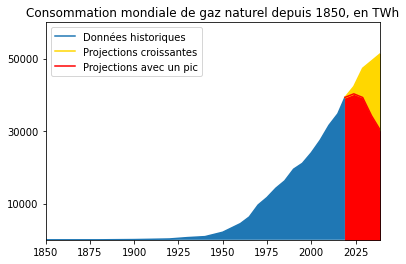

In [66]:
time = np.array([1850 + n*10 for n in range(12)] + [x for x in range(1965, 2020, 5)] + [2019])
consumption = np.array([0, 0, 0, 0, 33, 64, 142, 233, 603, 875, 2092, 4472, 6303,
                       9614, 11661, 14239, 16261, 19483, 21108, 24000, 27464, 31606, 34781, 39292])

future = np.array([x for x in range(2019, 2040, 5)])
projection_peak = np.array([39292, 40280, 39273, 34240, 30200])
projection_rise = np.array([39292, 42294, 47330, 49340, 51360])

plt.fill_between(time, consumption)
plt.fill_between(future, projection_peak, color = 'red')
plt.fill_between(future, projection_peak, projection_rise, color = 'gold')
plt.plot(time, consumption, label = 'Données historiques')
plt.plot(future, projection_rise, color = 'gold', label = 'Projections croissantes')
plt.plot(future, projection_peak, color = 'red', label = 'Projections avec un pic')
plt.xlim(1850, 2039)
plt.ylim(0, 60000)
plt.yticks(np.arange(10000, 50001, 20000))
plt.legend()
plt.title('Consommation mondiale de gaz naturel depuis 1850, en TWh');
#plt.savefig('consommation_gaz.png', dpi = 1200);

### Approvisionnement des ressources

#### Baisse des rendements

In [67]:
rd2010 = dpt.loc[:, 'Prod.2010.Ble.tendre':'Prod.2010.Soja'].sum(axis = 1)/dpt.loc[:, 'Surf.2010.Ble.tendre':'Surf.2010.Soja'].sum(axis = 1)
rd2050 = dpt.loc[:, 'Prod.2050.Ble.tendre':'Prod.2050.Soja'].sum(axis = 1)/dpt.loc[:, 'Surf.2050.Ble.tendre':'Surf.2050.Soja'].sum(axis = 1)


france['Evolution_rendements'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    france.loc[k, 'Evolution_rendements'] = 100*(rd2050/rd2010 - 1).loc[ind]

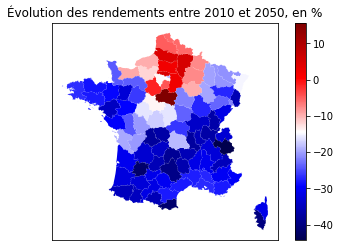

In [68]:
viz('Evolution_rendements', color = 'seismic', title = 'Évolution des rendements entre 2010 et 2050, en %')

#### Réduction des cheptels : exemple des vaches laitières

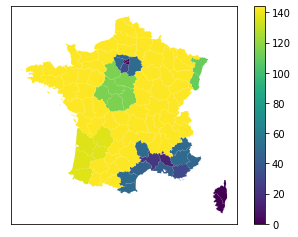

In [69]:
france['Reduction_vaches_laitieres'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    vaches10 = dpt.loc[ind, 'Vaches_laitieres_2010']
    vaches50 = dpt.loc[ind, 'Vaches_laitieres_2050']
    if vaches50 > 1:
        france.loc[k, 'Reduction_vaches_laitieres'] = 100*vaches10/vaches50
        
viz('Reduction_vaches_laitieres')

### CIMSE

In [70]:
# On fait la même hypothèse du seuil à 4 tMS/ha
# Les rendements sont ici des rendements moyen de récolte avec cette hypothèse

france['CIMSE_2050a'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    pe = s2050_ete[ind]*dpt.loc[ind, 'Rend_MS_ete']
    ph = s2050_hiver[ind]*dpt.loc[ind, 'Rend_MS_hiver']
    france.loc[k, 'CIMSE_2050a'] =  (pe + ph)*218*11.04/10**9

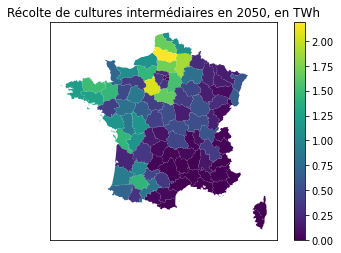

In [71]:
viz('CIMSE_2050a', title = 'Récolte de cultures intermédiaires en 2050, en TWh')

In [72]:
# Avec les données de récolte de la base de données

france['CIMSE_2050b'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    france.loc[k, 'CIMSE_2050b'] =  dpt.loc[ind, 'CIMSES.recolte.2050']

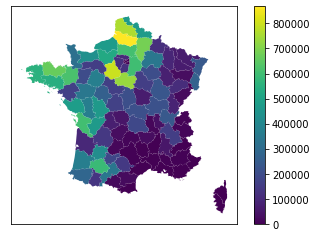

In [73]:
viz('CIMSE_2050b')

On trouve des résultats extrêmement proches !

### Déjections d'élevage

In [74]:
# Avec la base de données

france['DEJ_2050'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    france.loc[k, 'DEJ_2050'] =  dpt.loc[ind, 'Fumier_2050':'Fientes_2050'].sum()

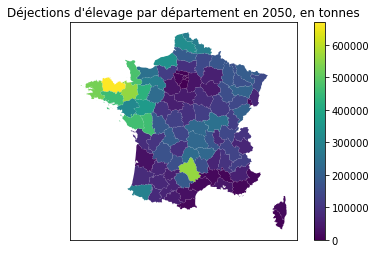

In [75]:
viz('DEJ_2050', title = "Déjections d'élevage par département en 2050, en tonnes")

### (Bois-énergie)

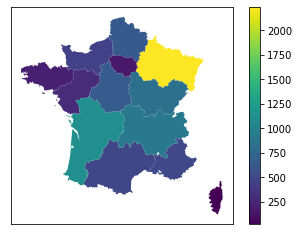

In [76]:
# Source : Agreste, Récolte de bois en 2019
# Volumes en milliers de m3 de bois rond

regfr['Recolte_bois'] = [1076, 7569, 2901, 1017, 4905, 5468, 873, 24, 1238, 1314, 10178, 307, 2025]
regfr['BE'] = [295, 2238, 490, 217, 828, 917, 500, 19, 437, 638, 1116, 166, 652]
regfr['Part_BE'] = 100*regfr['BE']/regfr['Recolte_bois'] # en pourcents

viz('BE', regfr)

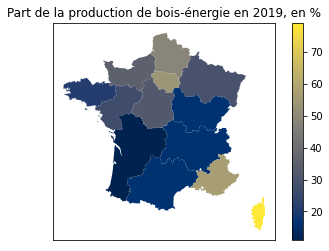

In [77]:
viz('Part_BE', regfr, title = "Part de la production de bois-énergie en 2019, en %", color = 'cividis')

### (Produits connexes de scieries)

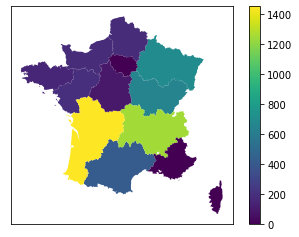

In [78]:
# Source : Agreste
# En milliers de tonnes

regfr['PCS_hors_trituration'] = [198, 695, 418, 157, 652, 1248, 0, 0, 179, 177, 1449, 0, 93]

viz('PCS_hors_trituration', regfr)